In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score




In [2]:
data = pd.read_csv('../resources/dataset.csv')


In [3]:
# sort by player name
data = data.sort_values('Name')


In [4]:
data = data.copy()

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4827 entries, 3230 to 3810
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   IDfg      4827 non-null   int64  
 1   Season    4827 non-null   int64  
 2   Name      4827 non-null   object 
 3   Age       4827 non-null   int64  
 4   PA        4827 non-null   int64  
 5   H         4827 non-null   int64  
 6   HR        4827 non-null   int64  
 7   R         4827 non-null   int64  
 8   RBI       4827 non-null   int64  
 9   SB        4827 non-null   int64  
 10  BB        4827 non-null   int64  
 11  SO        4827 non-null   int64  
 12  AVG       4827 non-null   float64
 13  OBP       4827 non-null   float64
 14  SLG       4827 non-null   float64
 15  OPS       4827 non-null   float64
 16  wOBA      4827 non-null   float64
 17  WAR       4827 non-null   float64
 18  BABIP     4827 non-null   float64
 19  LD%       4827 non-null   float64
 20  GB%       4827 non-null   float6

### Cleaning data

In [6]:
# Filtering data
players_2021_2022 = data[(data['Season'] == 2021) | (data['Season'] == 2022)]['IDfg'].unique()
data_active_players = data[data['IDfg'].isin(players_2021_2022)]

# Number of season by player
season_per_players = data_active_players['IDfg'].value_counts()

# Players with 4 or more seasons
players_with_4_or_more_seasons = season_per_players[season_per_players >= 4].index

# Filter data for analysis
data_for_anlysis = data_active_players[data_active_players['IDfg'].isin(players_with_4_or_more_seasons)]

print(f"Total number of players who meet the criteria: {len(players_with_4_or_more_seasons)}")


Total number of players who meet the criteria: 376


In [7]:
# Show players names and hits by season, sort by players names
data_for_anlysis[['Name', 'Season', 'H']].sort_values(by='Name')

,Name,Season,H
560,A.J. Pollock,2021,114
39,A.J. Pollock,2015,192
924,A.J. Pollock,2018,106
1154,A.J. Pollock,2017,113
2577,A.J. Pollock,2022,120
...,...,...,...
343,Yuli Gurriel,2019,168
2321,Zack Wheeler,2019,12
2817,Zack Wheeler,2018,11
3865,Zack Wheeler,2014,4


In [8]:
# how many players names apear more than one season

data_for_anlysis['Name'].value_counts()

Name
Brandon Belt       9
Jason Castro       9
Kole Calhoun       9
Cesar Hernandez    9
Kolten Wong        9
                  ..
Kyle Lewis         4
Renato Nunez       4
Cam Gallagher      4
Luis Arraez        4
Zack Wheeler       4
Name: count, Length: 376, dtype: int64

In [9]:
data = data_for_anlysis.copy()

In [10]:
# Drop columns with missing values
data = data.dropna(axis=1)



In [11]:
# drop Name column
data.drop('Name', axis=1, inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2450 entries, 560 to 3226
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   IDfg      2450 non-null   int64  
 1   Season    2450 non-null   int64  
 2   Age       2450 non-null   int64  
 3   PA        2450 non-null   int64  
 4   H         2450 non-null   int64  
 5   HR        2450 non-null   int64  
 6   R         2450 non-null   int64  
 7   RBI       2450 non-null   int64  
 8   SB        2450 non-null   int64  
 9   BB        2450 non-null   int64  
 10  SO        2450 non-null   int64  
 11  AVG       2450 non-null   float64
 12  OBP       2450 non-null   float64
 13  SLG       2450 non-null   float64
 14  OPS       2450 non-null   float64
 15  wOBA      2450 non-null   float64
 16  WAR       2450 non-null   float64
 17  BABIP     2450 non-null   float64
 18  LD%       2450 non-null   float64
 19  GB%       2450 non-null   float64
 20  Contact%  2450 non-null   float64

### Modeling

Random Forest

In [13]:
X = data.drop('H', axis=1)

y = data['H']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:

# Assuming you've already created X and y by dropping and selecting the 'H' column respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest Regressor instance
rf_regressor = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 2.244857142857143
Mean Squared Error (MSE): 11.551453061224489
Root Mean Squared Error (RMSE): 3.398742864828772
R^2 Score: 0.9957164515039998


In [15]:
# Assuming 'rf_regressor' is your fitted Random Forest model
feature_importances = rf_regressor.feature_importances_

# Create a pandas Series for easier plotting, using the feature names as the index
features = pd.Series(feature_importances, index=X_train.columns)

# Sort the features by importance
features_sorted = features.sort_values(ascending=False)

# print features with importance score
print(features_sorted)


PA          0.945665
AVG         0.048218
BB          0.001637
OBP         0.000581
BABIP       0.000395
Contact%    0.000299
SB          0.000285
LD%         0.000258
GB%         0.000255
SO          0.000251
IDfg        0.000251
WAR         0.000239
RBI         0.000227
R           0.000224
Age         0.000209
OPS         0.000206
SwStr%      0.000199
wOBA        0.000175
SLG         0.000158
HR          0.000139
Season      0.000131
dtype: float64


#### PA is overwhelming other signals in a model

Solutions:
- Normalize Hits by PA: Instead of removing PA, consider modeling hits per plate appearance (H/PA) 
- Feature Engineering: Create features that combine PA with other metrics. For instance, hits per contact or normalize other performance metrics by PA to capture how effectively players use their opportunities.
- Use PA as a Weight: In some modeling approaches, we can use PA as a weight rather than a feature. This way, the model gives more importance to observations with more plate appearances, acknowledging that more data points could lead to a more reliable measurement of a player's hitting ability.

### Utilize Efficiency in Total Hits Prediction

In [16]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2450 entries, 560 to 3226
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   IDfg      2450 non-null   int64  
 1   Season    2450 non-null   int64  
 2   Age       2450 non-null   int64  
 3   PA        2450 non-null   int64  
 4   H         2450 non-null   int64  
 5   HR        2450 non-null   int64  
 6   R         2450 non-null   int64  
 7   RBI       2450 non-null   int64  
 8   SB        2450 non-null   int64  
 9   BB        2450 non-null   int64  
 10  SO        2450 non-null   int64  
 11  AVG       2450 non-null   float64
 12  OBP       2450 non-null   float64
 13  SLG       2450 non-null   float64
 14  OPS       2450 non-null   float64
 15  wOBA      2450 non-null   float64
 16  WAR       2450 non-null   float64
 17  BABIP     2450 non-null   float64
 18  LD%       2450 non-null   float64
 19  GB%       2450 non-null   float64
 20  Contact%  2450 non-null   float64

In [17]:
# Pravilno kreiranje trening i test setova sa .copy()
train_data = data[data['Season'] <= 2020].copy()
test_data = data[data['Season'] >= 2021].copy()



### Model Hitting Efficiency: 
 Use Random Forest model to predict H/PA 
 based on  players' attributes, historical performance data, 
 and possibly team or season factors that might influence a player's opportunities and performance.

In [18]:
# Bezbedno izračunavanje H/PA za trening set koristeći .loc
train_data.loc[:, 'H_PA'] = train_data['H'] / train_data['PA']

# Bezbedno izračunavanje H/PA za test set koristeći .loc
test_data.loc[:, 'H_PA'] = test_data['H'] / test_data['PA']


In [19]:
X_train_hpa = train_data.drop(['H', 'PA', 'H_PA'], axis=1)  # Izuzmite ciljne varijable i direktne prediktore
y_train_hpa = train_data['H_PA']  # Ciljna varijabla za trening set

X_test_hpa = test_data.drop(['H', 'PA', 'H_PA'], axis=1)  # Izuzmite ciljne varijable i direktne prediktore za test set
y_test_hpa = test_data['H_PA']  # Ciljna varijabla za test set


In [20]:
# Treniranje modela za H/PA
model_hpa = RandomForestRegressor(n_estimators=100, random_state=42)
model_hpa.fit(X_train_hpa, y_train_hpa)

RandomForestRegressor(random_state=42)

In [21]:
# Predikcije i evaluacija za H/PA model
y_pred_hpa = model_hpa.predict(X_test_hpa)
mse_hpa = mean_squared_error(y_test_hpa, y_pred_hpa)
r2_hpa = r2_score(y_test_hpa, y_pred_hpa)

In [22]:

print(f'Model H/PA - MSE: {mse_hpa}, R^2: {r2_hpa}')

Model H/PA - MSE: 1.5032911691776373e-05, R^2: 0.9901185721393441


In [23]:
# Predviđanja H/PA koristeći model_hpa
predicted_hpa = model_hpa.predict(X_test_hpa)

# Kreiranje DataFrame-a za predviđena H/PA
predicted_H_PA_df = pd.DataFrame({
    'IDfg': X_test_hpa['IDfg'],
    'predicted_H_PA': predicted_hpa
})


### Estimate PAs: 
 For future total hits prediction, estimate the number of PAs a player is likely to have in the upcoming season.
 This estimation could be based on historical trends, player's role on the team, expert analysis, 
 tailored to forecast PAs.

In [24]:
# preparing the training and testing data for a machine learning model to predict PA
X_train_pa = train_data.drop(['PA', 'H', 'H_PA'], axis=1)  
y_train_pa = train_data['PA']  

X_test_pa = test_data.drop(['PA', 'H', 'H_PA'], axis=1)  
y_test_pa = test_data['PA']  


In [25]:
# Train the model
model_pa = RandomForestRegressor(n_estimators=100, random_state=42)
model_pa.fit(X_train_pa, y_train_pa)

RandomForestRegressor(random_state=42)

In [26]:
# Prediction and evaluation for PA model
y_pred_pa = model_pa.predict(X_test_pa)
mse_pa = mean_squared_error(y_test_pa, y_pred_pa)
r2_pa = r2_score(y_test_pa, y_pred_pa)

In [27]:
print(f'Model PA - MSE: {mse_pa}, R^2: {r2_pa}')

Model PA - MSE: 1643.2452359765052, R^2: 0.9541894406933964


In [28]:
# Predviđanja PA koristeći model_pa
predicted_pa = model_pa.predict(X_test_pa)

# Kreiranje DataFrame-a za predviđena PA
predicted_PA_df = pd.DataFrame({
    'IDfg': X_test_pa['IDfg'],
    'predicted_PA': predicted_pa
})

In [29]:
# Merge the predicted values with the original test data
combined_predictions_df = pd.merge(predicted_H_PA_df, predicted_PA_df, on='IDfg')


### Calculate Total Hits: 

In [30]:

# Multiply efficiency prediction (H/PA) by PA estimate to get the projected total hits for the season.

predicted_hits = y_pred_hpa * y_pred_pa


In [31]:
# Create a DataFrame with the player ID and the predicted hits
predicted_hits_df = pd.DataFrame({
    'IDfg': X_test_pa['IDfg'].reset_index(drop=True),
    'predicted_hits': predicted_hits
})


In [32]:
predicted_hits_df

,IDfg,predicted_hits
0,9256,108.453502
1,9256,119.573450
2,5297,82.693159
3,5297,23.003948
4,15640,159.352525
...,...,...
676,17232,71.596237
677,17232,127.164415
678,19198,171.512782
679,19198,114.671193


### Validation and Adjustment: 
 Validate approach by comparing total hits predictions against actual outcomes for past seasons, 
 adjusting methods for estimating PAs or refining the efficiency model as necessary.

In [33]:
# Merge the predicted hits with the actual hits
predicted_hits_df['actual_hits'] = test_data['H'].reset_index(drop=True)


In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(predicted_hits_df['actual_hits'], predicted_hits_df['predicted_hits'])
mse = mean_squared_error(predicted_hits_df['actual_hits'], predicted_hits_df['predicted_hits'])
r2 = r2_score(predicted_hits_df['actual_hits'], predicted_hits_df['predicted_hits'])

print(f'MAE: {mae}, MSE: {mse}, R^2: {r2}')


MAE: 6.837940621082179, MSE: 82.52223398592399, R^2: 0.9646028167689213


Mean Absolute Error (MAE): 6.838 
- this level of error suggests that the model's predictions are relatively close to the actual numbers, but there's still room for improvement, especially if the average number of hits is not significantly high.

Mean Squared Error (MSE): 82.522 
- the MSE indicates that there are instances of significant discrepancy between the predicted and actual hits.

R-squared (R^2): 0.965 
- approximately 96.5% of the variation in the actual number of hits is explained by the model's inputs. This is a very high value, suggesting that the model is very effective at capturing the relationship between the player's characteristics and their performance in terms of hits. However, it's important to note that a high R^2 alone does not indicate perfect prediction accuracy, as it does not account for the magnitude of errors.

##### Conclusion
Overall, these metrics indicate that the model is quite effective at predicting the total number of hits for players in the upcoming season, with a high R^2 value suggesting strong explanatory power. However, the MAE and MSE values suggest that there are still differences between the predicted and actual values, with some predictions likely being significantly off. This discrepancy may be due to outliers, specific cases not well-handled by the model, or missing factors that could improve the model's accuracy. Further analysis and model refinement could focus on reducing these errors for even more precise predictions.

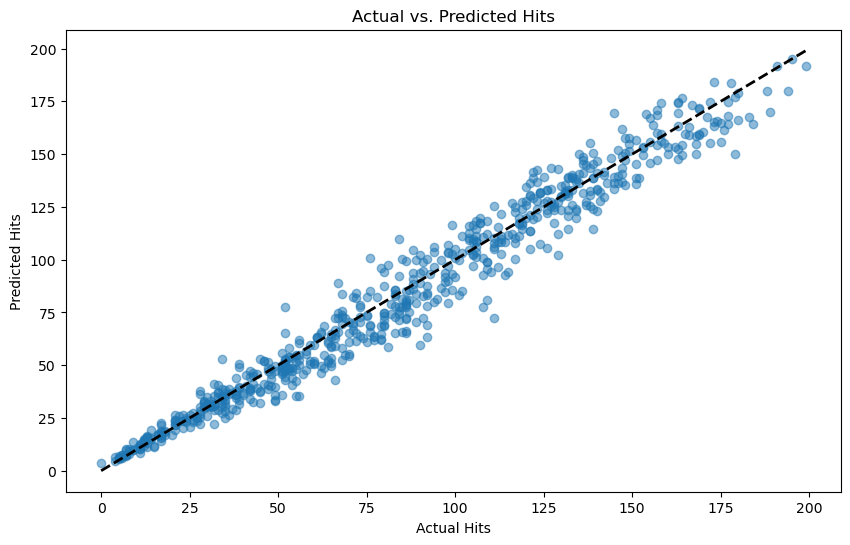

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(predicted_hits_df['actual_hits'], predicted_hits_df['predicted_hits'], alpha=0.5)
plt.plot([predicted_hits_df['actual_hits'].min(), predicted_hits_df['actual_hits'].max()], [predicted_hits_df['actual_hits'].min(), predicted_hits_df['actual_hits'].max()], 'k--', lw=2)
plt.xlabel('Actual Hits')
plt.ylabel('Predicted Hits')
plt.title('Actual vs. Predicted Hits')
plt.show()
